In [1]:
#%%
#%pip install jax
%matplotlib ipympl
import jax.numpy as jnp
from jax.numpy import pi, cos, sin, arccos, arctan2, exp, array, mod, sum, zeros, mean, equal
from jax.example_libraries import stax, optimizers
import pickle
import matplotlib.pyplot as plt
import numpy.random as nprd

#%%



def parametrize(tp):
    theta = tp[0]
    phi = mod(tp[1],pi/2)
    return array([ theta/pi, phi/pi/2 ])

def unparametrize(xy):
    return array([ xy[0]*pi , xy[1]*2*pi ])

def tp2xyz(tp):
	return array([sin(tp[0])*cos(tp[1]) , sin(tp[0])*sin(tp[1]) , cos(tp[0])])




[2, 250, 150, 103, 7]
128 0.001 5e-06
0.9966099 0.9889846


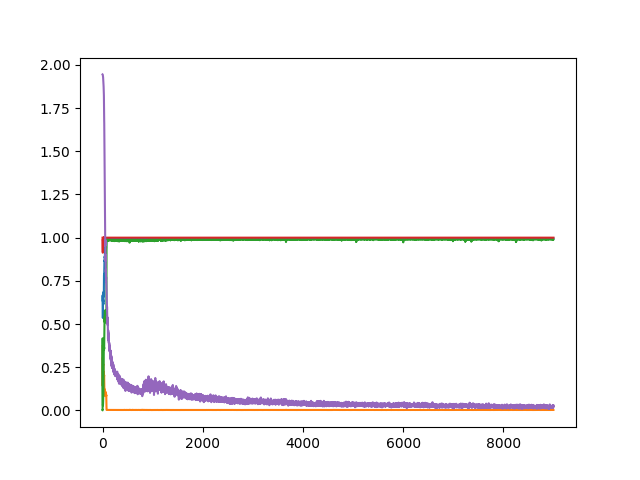

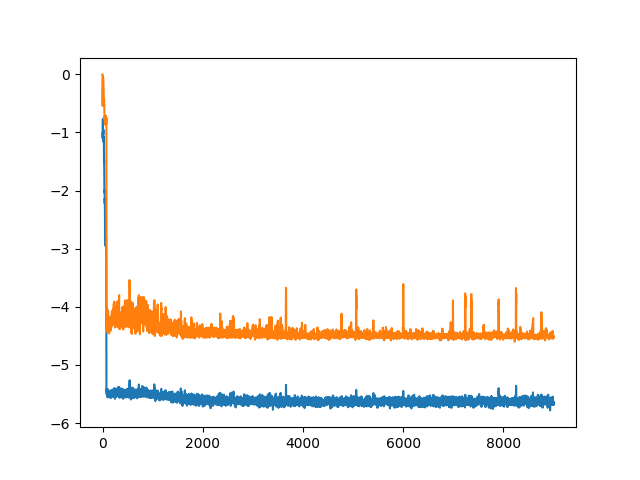

In [2]:
#%%

strTime = "23_165148"

layer_sizes, batches_size, learning_rate, l2regularizer, T_steps, load_state, fidelitieS = pickle.load(open("./NNparams_"+strTime+".pkl", "rb"))
print(layer_sizes)
print(batches_size[0],learning_rate,l2regularizer)
delta = 4*pi/T_steps
layers = []
for i in range(len(layer_sizes) - 1):
    layers.append(stax.Dense(layer_sizes[i + 1]))
    layers.append(stax.Relu)
layers.pop()
layers.append(stax.LogSoftmax)
init_random_params, apply_model = stax.serial(*layers)
opt_init, opt_update, opt_get_params = optimizers.adam(learning_rate)
params = opt_get_params(optimizers.pack_optimizer_state(load_state))
fig = plt.figure()
ax = fig.add_subplot()
for i in range(5):
    ax.plot(fidelitieS[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(jnp.log(1-array(fidelitieS[0])))
ax.plot(jnp.log(1-array(fidelitieS[2])))

print(fidelitieS[0][-1],fidelitieS[2][-1])

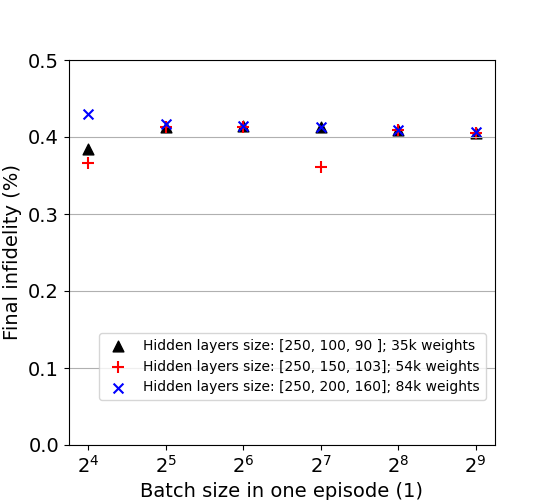

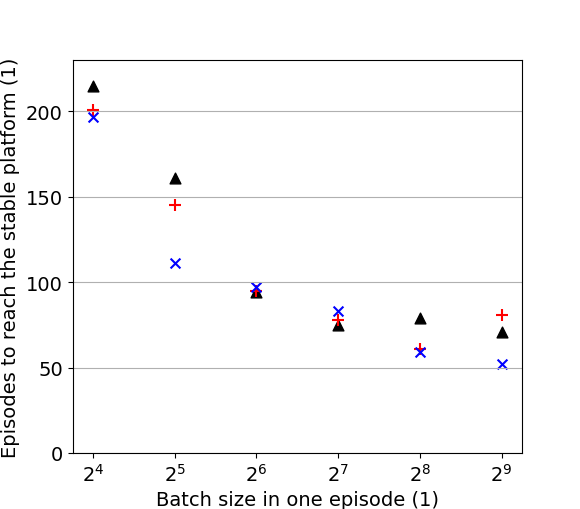

In [56]:
x_2power = [16,32,64,128,256,512]
platINF = array([
    [-5.61, -5.49, -5.49, -5.625, -5.50, -5.51],
    [-5.48, -5.29, -5.50, -5.49, -5.50, -5.50],
    [-5.56, -5.49, -5.485, -5.49, -5.50, -5.51],
    [-5.47, -5.48, -5.49, -5.50, -5.50, -5.50],
    [-5.45, -5.48, -5.485, -5.49, -5.50, -5.505]
])
platINF = exp(platINF)
platEps = [
    [201, 145, 95, 78, 61, 81],
    [190, 170, 116, 113, 89, 78],
    [215, 161, 94, 75, 79, 71],
    [113, 95, 81, 56, 61, 49],
    [197, 111, 97, 83, 59, 52]
]

fig = plt.figure(figsize=(5.5,5))
ax = fig.add_subplot()
ax.set_xscale("log",base=2)
ax.set_ylim((0,0.5))
ax.scatter(x_2power,100*platINF[2],label="Hidden layers size: [250, 100, 90 ]; 35k weights",marker="^",s=60,c="black")
ax.scatter(x_2power,100*platINF[0],label="Hidden layers size: [250, 150, 103]; 54k weights",marker="+",s=70,c="red")
ax.scatter(x_2power,100*platINF[4],label="Hidden layers size: [250, 200, 160]; 84k weights",marker="x",s=50,c="blue")
ax.set_xlabel("Batch size in one episode (1)")
ax.set_ylabel("Final infidelity (%)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="y")
#ax.grid(visible=True, which="minor",axis="both",alpha=0.15)
fig.legend(loc=(0.18,0.2))


fig = plt.figure(figsize=(5.8,5.1))
ax = fig.add_subplot()
ax.set_xscale("log",base=2)
ax.set_ylim((0,230))
ax.scatter(x_2power,platEps[2],label="Hidden layers size: [250, 100, 90 ]; 35k weights",marker="^",s=60,c="black")
ax.scatter(x_2power,platEps[0],label="Hidden layers size: [250, 150, 103]; 54k weights",marker="+",s=70,c="red")
ax.scatter(x_2power,platEps[4],label="Hidden layers size: [250, 200, 160]; 84k weights",marker="x",s=50,c="blue")
ax.set_xlabel("Batch size in one episode (1)")
ax.set_ylabel("Episodes to reach the stable platform (1)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="y")
#ax.grid(visible=True, which="minor",axis="both",alpha=0.15)
#fig.legend(loc=(0.18,0.2))


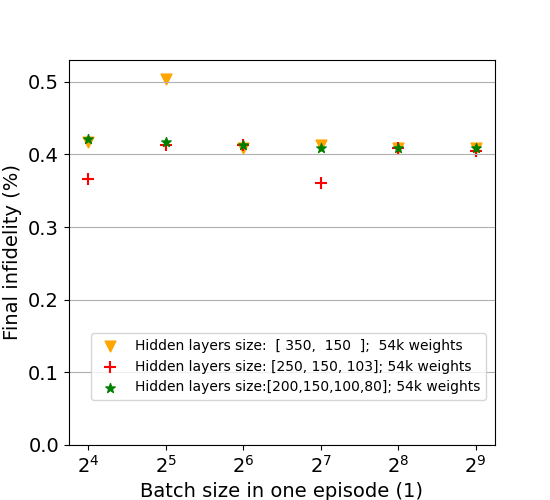

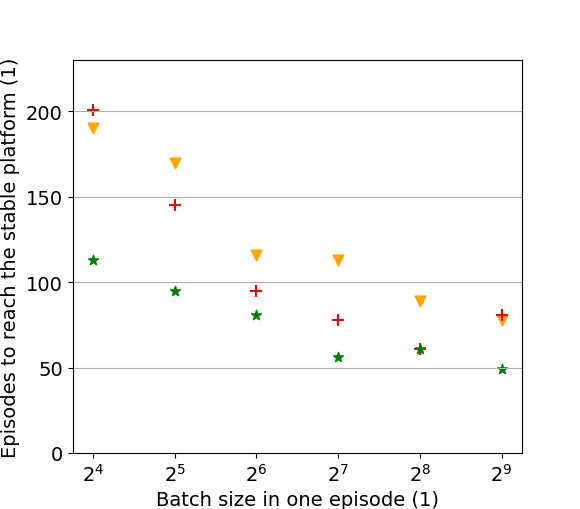

In [10]:
x_2power = [16,32,64,128,256,512]
platINF = array([
    [-5.61, -5.49, -5.49, -5.625, -5.50, -5.51],
    [-5.48, -5.29, -5.50, -5.49, -5.50, -5.50],
    [-5.56, -5.49, -5.485, -5.49, -5.50, -5.51],
    [-5.47, -5.48, -5.49, -5.50, -5.50, -5.50],
    [-5.45, -5.48, -5.485, -5.49, -5.50, -5.505]
])
platINF = exp(platINF)
platEps = [
    [201, 145, 95, 78, 61, 81],
    [190, 170, 116, 113, 89, 78],
    [215, 161, 94, 75, 79, 71],
    [113, 95, 81, 56, 61, 49],
    [197, 111, 97, 83, 59, 52]
]

fig = plt.figure(figsize=(5.5,5))
ax = fig.add_subplot()
ax.set_xscale("log",base=2)
ax.set_ylim((0,0.53))
ax.scatter(x_2power,100*platINF[1],label="Hidden layers size:  [ 350,  150  ];  54k weights",marker="v",s=60,c="orange")
ax.scatter(x_2power,100*platINF[0],label="Hidden layers size: [250, 150, 103]; 54k weights",marker="+",s=70,c="red")
ax.scatter(x_2power,100*platINF[3],label="Hidden layers size:[200,150,100,80]; 54k weights",marker="*",s=50,c="green")
ax.set_xlabel("Batch size in one episode (1)")
ax.set_ylabel("Final infidelity (%)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="y")
#ax.grid(visible=True, which="minor",axis="both",alpha=0.15)
fig.legend(loc=(0.165,0.2))


fig = plt.figure(figsize=(5.8,5.1))
ax = fig.add_subplot()
ax.set_xscale("log",base=2)
ax.set_ylim((0,230))
ax.scatter(x_2power,platEps[1],label="Hidden layers size:   [  350 ,  150  ] ;  54k weights",marker="v",s=60,c="orange")
ax.scatter(x_2power,platEps[0],label="Hidden layers size: [250 , 150 , 103 ]; 54k weights",marker="+",s=75,c="red")
ax.scatter(x_2power,platEps[3],label="Hidden layers size:[200,150,100,80]; 54k weights",marker="*",s=55,c="green")
ax.set_xlabel("Batch size in one episode (1)")
ax.set_ylabel("Episodes to reach the stable platform (1)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="y")
#ax.grid(visible=True, which="minor",axis="both",alpha=0.15)
#fig.legend(loc=(0.18,0.2))


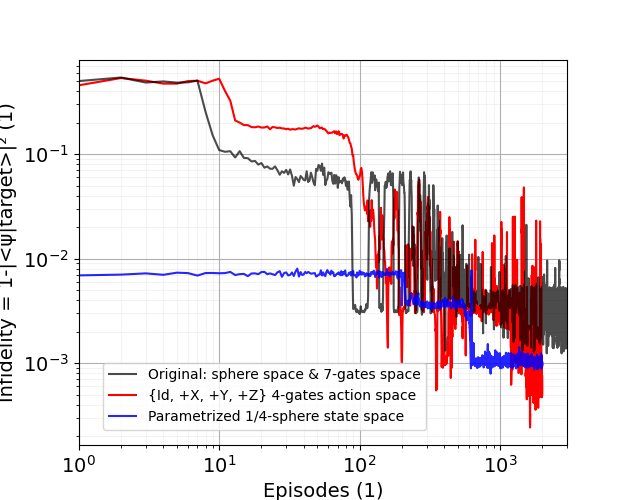

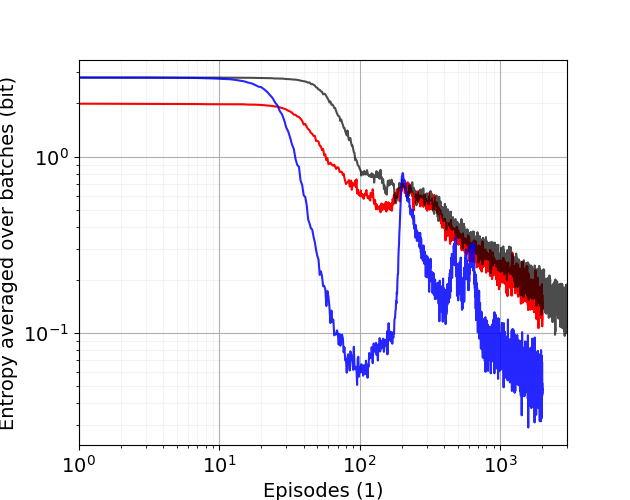

In [37]:
strTime = "23_1125"
layer_sizes, batches_size, learning_rate, l2regularizer, T_steps, load_state, fidelitieS = pickle.load(open("./NNparams_"+strTime+".pkl", "rb"))
Fqu = fidelitieS[0]
Squ = fidelitieS[4]

strTime = "23_1102"
layer_sizes, batches_size, learning_rate, l2regularizer, T_steps, load_state, fidelitieS = pickle.load(open("./NNparams_"+strTime+".pkl", "rb"))
F14 = fidelitieS[0]
S14 = fidelitieS[4]

strTime = "23_1107"
layer_sizes, batches_size, learning_rate, l2regularizer, T_steps, load_state, fidelitieS = pickle.load(open("./NNparams_"+strTime+".pkl", "rb"))
F4U = fidelitieS[0]
S4U = fidelitieS[4]

convoleK = jnp.ones(40)/40

fig = plt.figure(figsize=(6.3,5))
ax = fig.add_subplot()
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.loglog(1-array(F4U),label="{Id, +X, +Y, +Z} 4-gates action space",c="red")
ax.loglog(1-array(Fqu),label="Original: sphere space & 7-gates space",alpha=0.7,c="black")
ax.loglog(1-array(F14),label="Parametrized 1/4-sphere state space",alpha=0.85,c="blue")
ax.set_xlim((1,3e3))
#ax.set_ylim((0.002,4))
ax.set_xlabel("Episodes (1)")
ax.set_ylabel("Infidelity = 1-|<ψ|target>|² (1)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="both")
ax.grid(visible=True, which="minor",axis="both",alpha=0.15)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(0.05,0.04))


fig = plt.figure(figsize=(6.3,5))
ax = fig.add_subplot()
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.loglog(array(S4U)/jnp.log(2),label="{Id, +X, +Y, +Z} 4-gates action space",c="red")
ax.loglog(array(Squ)/jnp.log(2),label="Original: sphere space & 7-gates space",alpha=0.7,c="black")
ax.loglog(array(S14)/jnp.log(2),label="Parametrized 1/4-sphere state space",alpha=0.85,c="blue")
ax.set_xlim((1,3e3))
#ax.set_ylim((0.002,4))
ax.set_xlabel("Episodes (1)")
ax.set_ylabel("Entropy averaged over batches (bit)")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.grid(visible=True, which="major",axis="both")
ax.grid(visible=True, which="minor",axis="both",alpha=0.15)

